In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
from scipy.optimize import basinhopping
import random
import warnings

warnings.filterwarnings("ignore")

### 예제

In [3]:
data = {'ISIN코드':['US88339J1051','US8522341036','US2521311074','US64125C1099','US98980G1022','US29786A1060','US98138H1014',
                    'US5486611073','US0970231058','US6200763075','현금','합계'],
        '종목명':['트레이드 데스크(TTD)','블록(스퀘어)(SQ)','덱스컴','NEUROCRINE BIOSCIENCES INC','지스케일러','ETSY INC',
                  'WORKDAY INC','LOWE S COMPANIES INC','BOEING CO','MOTOROLA SOLUTIONS INC','예수금',''],
        '자산종류':['해외주식','해외주식','해외주식','해외주식','해외주식','해외주식','해외주식','해외주식','해외주식',
                    '해외주식','',''],
        '현재가':[58858.32,99856.43,131053.08,134303.77,151595.4,168936.48,213247.08,255122.77,262007.28,
                  316700.27,0,0],
        '목표비중':[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0,1]}
df = pd.DataFrame(data)

### 수량,평가금액,실잔고비중,차이 열 추가

In [4]:
row_num = len(df['ISIN코드'])
df.insert(4,'수량',0)
df.insert(5,'평가금액',0)
df.insert(6,'실잔고비중',0)
df.insert(8,'차이',0)
df

,ISIN코드,종목명,자산종류,현재가,수량,평가금액,실잔고비중,목표비중,차이
0,US88339J1051,트레이드 데스크(TTD),해외주식,58858.32,0,0,0,0.1,0
1,US8522341036,블록(스퀘어)(SQ),해외주식,99856.43,0,0,0,0.1,0
2,US2521311074,덱스컴,해외주식,131053.08,0,0,0,0.1,0
3,US64125C1099,NEUROCRINE BIOSCIENCES INC,해외주식,134303.77,0,0,0,0.1,0
4,US98980G1022,지스케일러,해외주식,151595.40,0,0,0,0.1,0
5,US29786A1060,ETSY INC,해외주식,168936.48,0,0,0,0.1,0
6,US98138H1014,WORKDAY INC,해외주식,213247.08,0,0,0,0.1,0
7,US5486611073,LOWE S COMPANIES INC,해외주식,255122.77,0,0,0,0.1,0
8,US0970231058,BOEING CO,해외주식,262007.28,0,0,0,0.1,0
9,US6200763075,MOTOROLA SOLUTIONS INC,해외주식,316700.27,0,0,0,0.1,0


### 수량 필드 채워지면 나머지 필드 계산 모듈   

In [5]:
def calc_table():
    row_num = len(df['ISIN코드'])
    df['평가금액'][:-2] = df['현재가'][:-2]*df['수량'][:-2]
    df['평가금액'][row_num-2] = money - np.sum(df['평가금액'][:-2])
    df['실잔고비중'][:-1] = df['평가금액'][:-1]/money
    df['차이'][:-1] = abs(df['실잔고비중'][:-1]-df['목표비중'][:-1])
    df['평가금액'][row_num-1] = np.sum(df['평가금액'][:-1])
    df['실잔고비중'][row_num-1] = np.sum(df['실잔고비중'][:-1])
    df['차이'][row_num-1] = np.sum(df['차이'][:-1])

In [6]:
# 목표비중과 실잔고비중의 차이의 절대값 합
def min_gap(수량):
    row_num = len(수량)
    수량 = np.array(수량)
    평가금액 = df['현재가'][:-2] * 수량
    if  money > np.sum(평가금액):
        평가금액[row_num] = money - np.sum(평가금액)
        gap = np.sum(abs(평가금액/money - df['목표비중'][:-1]))
    else:
        gap = 2
    return gap

### 운용금액. 동일 MP에 대해 운용금액만 바꿔서 계산 목적

In [7]:
money = 5000000

### 목표비중으로 수량계산 후 소수점이하 절사. 기본 계산방식

In [8]:
df['수량'][:-2] = ((money * df['목표비중'][:-2]) / df['현재가'][:-2]).astype(int)
calc_table()
df
df.copy()

,ISIN코드,종목명,자산종류,현재가,수량,평가금액,실잔고비중,목표비중,차이
0,US88339J1051,트레이드 데스크(TTD),해외주식,58858.32,8,470866.56,0.094173,0.1,0.005827
1,US8522341036,블록(스퀘어)(SQ),해외주식,99856.43,5,499282.15,0.099856,0.1,0.000144
2,US2521311074,덱스컴,해외주식,131053.08,3,393159.24,0.078632,0.1,0.021368
3,US64125C1099,NEUROCRINE BIOSCIENCES INC,해외주식,134303.77,3,402911.31,0.080582,0.1,0.019418
4,US98980G1022,지스케일러,해외주식,151595.40,3,454786.20,0.090957,0.1,0.009043
5,US29786A1060,ETSY INC,해외주식,168936.48,2,337872.96,0.067575,0.1,0.032425
6,US98138H1014,WORKDAY INC,해외주식,213247.08,2,426494.16,0.085299,0.1,0.014701
7,US5486611073,LOWE S COMPANIES INC,해외주식,255122.77,1,255122.77,0.051025,0.1,0.048975
8,US0970231058,BOEING CO,해외주식,262007.28,1,262007.28,0.052401,0.1,0.047599
9,US6200763075,MOTOROLA SOLUTIONS INC,해외주식,316700.27,1,316700.27,0.063340,0.1,0.036660


### 유전자알고리즘적용. 포트폴리오 수량 계산

In [8]:
def main_proc(target_gap,bnds):
    global value1, best_var
    var_cnt = len(bnds)
    value1 = 100
    best_var = []
    mutation_rate = 0.3

    # 십진수로 변환해서 목적함수에 전달
    def call_func(binary):
        global value1, best_var
        var = []
        for ii in range(var_cnt):
            binary0 = binary[ii*8:ii*8+8]
            decimal = int(binary0,2) + bnds[ii][0]
            if  decimal > bnds[ii][1]: # 변수값 범위를 벗어나는 경우 오류로 뱉어 냄
                return 100
            var.append(decimal)
#        print(var)
        result = min_gap(var)
#        print(result)
        if  value1 > result:
            value1 = result
            best_var = var
        return result  
    
    equal_cnt_k = 0
    min_val_k = value1
    for k in range(100):
        chromosome_list = []
        for i in range(32):
            chromosome = ''
            for ii in range(var_cnt):
                decimal = random.randint(0, bnds[ii][1] - bnds[ii][0])
                gene = format(decimal,'b').zfill(8) # 숫자가 아닌 텍스트로 전환
                chromosome = chromosome + gene # 주욱 이어붙임
            chromosome_list.append(chromosome)

        equal_cnt_i = 0
        min_val = value1
        for i in range(100):
#            print("실행횟수 =", k*100+i)
            chromosome_list0 = sorted(chromosome_list, key=call_func)

            if  value1 > target_gap:
                if  min_val > value1:
                    min_val = value1
                    equal_cnt_i = 0
                else:
                    equal_cnt_i += 1
                if  equal_cnt_i >= 30:  # 더 이상 최저값이 갱신되지 않으면 종료한다.
                    break
            else:
                break

            chromosome_list0[31] = chromosome_list0[0] # 1등 염색체를 꼴찌 염색체에 엎어친다. 꼴찌는 사라지고 1등은 생존 확률이 높아진다

    # crossover
            X = random.randint(4, ((var_cnt) * 8) - 4)
            for ii in range(15):
                temp = chromosome_list0[ii][X:]
                chromosome_list0[ii] = chromosome_list0[ii][:X] + chromosome_list0[29-ii][X:]
                chromosome_list0[29-ii]= chromosome_list0[29-ii][:X] + temp
            temp = chromosome_list0[31][X:]
            chromosome_list0[31] = chromosome_list0[31][:X] + chromosome_list0[30][X:]
            chromosome_list0[30]= chromosome_list0[30][:X] + temp

    # mutation
            rand = random.random()
            if rand < mutation_rate:
                for j in range(4):  # 1/8에 돌연변이 염색체를 반영한다.
                    chromosome1 = ''
                    for ii in range(var_cnt):
                        decimal = random.randint(0, bnds[ii][1] - bnds[ii][0])
                        gene = format(decimal,'b').zfill(8) # 숫자가 아닌 텍스트로 전환
                        chromosome1 = chromosome1 + gene # 주욱 이어붙임
                    rand_num = random.randint(1, 30)
                    chromosome_list0[rand_num] = chromosome1
            chromosome_list = chromosome_list0
        
        if  min_val_k > min_val:
            min_val_k = min_val
            equal_cnt_k = 0
        else:
            equal_cnt_k += 1
        if  equal_cnt_k >= 20:  # 더 이상 최고값이 갱신되지 않으면 종료한다.
            break
#    print("결과값 = ",value1)
#    print(best_var)
    df['수량'][:-2] = best_var
    calc_table()
    display(df)        


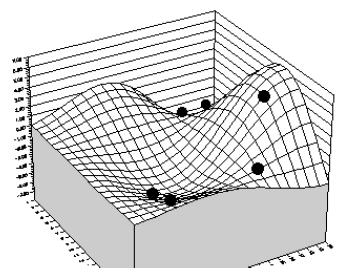
### 초기 랜덤 값에 의해 매번 결과가 달라짐. 여러 번 수행해서 좋은 결과를 선택하면 됨

In [9]:
if __name__ == '__main__':
    df['수량'][:-2] = ((money * df['목표비중'][:-2]) / df['현재가'][:-2]).astype(int)
    # 절사 수량에서 +- 3수량한 것을 범위값으로 줌
    bnds = tuple((max(0,df['수량'][x]-3),df['수량'][x]+3) for x in range(row_num-2))
    target_gap = 0.2  # 괴리율의 합이 20%미만이 목표임
    main_proc(target_gap,bnds)

,ISIN코드,종목명,자산종류,현재가,수량,평가금액,실잔고비중,목표비중,차이
0,US88339J1051,트레이드 데스크(TTD),해외주식,58858.32,10,588583.20,0.117717,0.1,0.017717
1,US8522341036,블록(스퀘어)(SQ),해외주식,99856.43,6,599138.58,0.119828,0.1,0.019828
2,US2521311074,덱스컴,해외주식,131053.08,3,393159.24,0.078632,0.1,0.021368
3,US64125C1099,NEUROCRINE BIOSCIENCES INC,해외주식,134303.77,5,671518.85,0.134304,0.1,0.034304
4,US98980G1022,지스케일러,해외주식,151595.40,3,454786.20,0.090957,0.1,0.009043
5,US29786A1060,ETSY INC,해외주식,168936.48,3,506809.44,0.101362,0.1,0.001362
6,US98138H1014,WORKDAY INC,해외주식,213247.08,2,426494.16,0.085299,0.1,0.014701
7,US5486611073,LOWE S COMPANIES INC,해외주식,255122.77,2,510245.54,0.102049,0.1,0.002049
8,US0970231058,BOEING CO,해외주식,262007.28,2,524014.56,0.104803,0.1,0.004803
9,US6200763075,MOTOROLA SOLUTIONS INC,해외주식,316700.27,1,316700.27,0.063340,0.1,0.036660
